# Libraries

In [1]:
library('data.table')

# Path

In [2]:
path_in <- './outs/'
path_original_data<-'../../data'
path_out <- './outs/'

# Load data

In [3]:
# count matrix
counts <- as.data.frame(fread(paste0(path_in,'counts_original.csv')
                              ,header=TRUE))
rownames(counts)<-counts$index
counts<- counts[,-1]
print(str(counts))
print(head(rownames(counts)))

'data.frame':	51005 obs. of  14160 variables:
 $ A10_P3_M11                       : num  0 0 0 0 0.0239 ...
 $ A11_P1_M11                       : num  0 0 0.972 0 0 ...
 $ A11_P3_M11                       : num  0 0 0.027 0 0 ...
 $ A11_P4_M11                       : num  0 0 0.7156 0 0.0253 ...
 $ A12_P3_M11                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A12_P6_M11                       : num  0 0 0 0.0145 0 ...
 $ A2_P1_M11                        : num  0 0 0 0 0 ...
 $ A2_P4_M11                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A3_P1_M11                        : num  0 0 0.768 0 0 ...
 $ A3_P3_M11                        : num  0 0 0 0 0 ...
 $ A4_P3_M11                        : num  0 0 0 0 0.0194 ...
 $ A4_P4_M11                        : num  0 0 0 0 0 ...
 $ A4_P6_M11                        : num  0 0 0 0 0.0147 ...
 $ A5_P4_M11                        : num  0 0 0.775 0.104 0.882 ...
 $ A5_P5_M11                        : num  0 0 0.6385 0 0.0357 ...
 $ A6_P1_M11   

In [4]:
# cell annotation files
anno_cells <- read.csv(paste0(path_in,'anno_cells_original.csv')
                                ,sep=',')
print(str(anno_cells))

'data.frame':	14160 obs. of  15 variables:
 $ index             : chr  "A10_P3_M11" "A11_P1_M11" "A11_P3_M11" "A11_P4_M11" ...
 $ orig.ident        : chr  "A10" "A11" "A11" "A11" ...
 $ nCount_RNA        : num  409232 357030 360531 384902 155214 ...
 $ nFeature_RNA      : int  3274 2621 3118 4335 2945 3979 2034 3710 3846 4342 ...
 $ sample            : chr  "Pre_P1" "Pre_P1" "Pre_P1" "Pre_P1" ...
 $ treatment_response: chr  "Responder" "Responder" "Responder" "Responder" ...
 $ treatment         : chr  "anti-CTLA4" "anti-CTLA4" "anti-CTLA4" "anti-CTLA4" ...
 $ percent.mt        : num  3.95 2.63 5.6 2.23 12.07 ...
 $ seurat_clusters   : int  16 11 11 11 11 11 5 11 16 8 ...
 $ annotation_CHETAH : chr  "T CD4" "T CD4" "T CD4" "T reg" ...
 $ cell_ontology     : chr  "NK" "T CD8 naïve" "T CD8 naïve" "T CD8 naïve" ...
 $ cell_ontology_id  : chr  "CL:0000623" "CL:0000900" "CL:0000900" "CL:0000900" ...
 $ annotation_major  : chr  "NK" "T" "T" "T" ...
 $ annotation_immune : chr  "NK" "T CD8" "T

In [5]:
# gene annotation files
anno_genes <- read.csv(paste0(path_in,'anno_genes_original.csv')
                                ,sep=',')
rownames(anno_genes) <- anno_genes$index
print(str(anno_genes))

'data.frame':	51005 obs. of  10 variables:
 $ index                    : chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ vst.mean                 : num  0.1874 0.0254 25.1239 11.7653 12.0984 ...
 $ vst.variance             : num  55.62 1.71 5881.65 4097.14 4653.66 ...
 $ vst.variance.expected    : num  15.66 1.13 9646 3859.3 3994.57 ...
 $ vst.variance.standardized: num  2.95 1.52 0.61 1.06 1.16 ...
 $ vst.variable             : chr  "True" "False" "False" "False" ...
 $ highly_variable          : chr  "False" "False" "False" "True" ...
 $ means                    : num  0.001669 0.000333 0.163605 0.073268 0.074602 ...
 $ dispersions              : num  0.179 -0.664 0.186 0.365 0.274 ...
 $ dispersions_norm         : num  0.899 0.14 -0.38 1.067 0.984 ...
NULL


In [6]:
# patient annotation files
anno_patients <- read.csv(paste0(path_original_data, '/mmc1/Patient-scRNA_data.tsv')
                                ,sep='\t')
print(str(anno_patients))

'data.frame':	32 obs. of  15 variables:
 $ X                                                                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Patient.ID                                                               : chr  "P1" "P2" "P3" "P4" ...
 $ Gender..F.M.                                                             : chr  "M" "M" "F" "M" ...
 $ Age                                                                      : int  49 75 83 29 33 66 74 49 60 68 ...
 $ Therapy                                                                  : chr  "CTLA4 (baseline); PD1 (post I and II)" "PD1" "PD1" "CTLA4+PD1" ...
 $ Clinical.response..RECIST..R.CR..PR..NR.SD..PD.                          : chr  "Resistance" "NR" "NR" "R" ...
 $ Baseline.Biopsy..days.from.baseline..site..lesion.response.              : chr  "0; right chest; regression" "0; small bowel; progression" "0; right anterior lower leg; progression" "(-2); left shoulder; progression prior to therapy" ...
 $ Post.I.biopsy..d

In [7]:
# sample annotation file
anno_samples <- read.csv(paste0(path_original_data, '/mmc1/Lesion-scRNAseq data.tsv')
                                ,sep='\t')
print(anno_samples)

   Patient Sample.name Response.status..R.responder..NR.non.responder  X X.1
1       P1      Pre_P1                                             R  NA  NA
2       P1     Post_P1                                             R  NA  NA
3       P1   Post_P1_2                                             NR NA  NA
4       P2      Pre_P2                                             NR NA  NA
5       P2     Post_P2                                             NR NA  NA
6       P3      Pre_P3                                             NR NA  NA
7       P3     Post_P3                                             NR NA  NA
8       P3   Post_P3_2                                             NR NA  NA
9       P4      Pre_P4                                             NR NA  NA
10      P4     Post_P4                                              R NA  NA
11      P5     Post_P5                                             NR NA  NA
12      P5   Post_P5_2                                              R NA  NA

# Process data

## Clean anno_patients

In [8]:
# put all column names to lower case
colnames(anno_patients) <- tolower(colnames(anno_patients))

# remove infomation after '..'
colnames(anno_patients) <- gsub('\\.\\..*','',colnames(anno_patients))

# substitute dots with _
colnames(anno_patients) <- gsub('[.]','_',colnames(anno_patients))

print(colnames(anno_patients))

 [1] "x"                                                                        
 [2] "patient_id"                                                               
 [3] "gender"                                                                   
 [4] "age"                                                                      
 [5] "therapy"                                                                  
 [6] "clinical_response"                                                        
 [7] "baseline_biopsy"                                                          
 [8] "post_i_biopsy"                                                            
 [9] "post_ii_biopsy"                                                           
[10] "wes"                                                                      
[11] "overall_survival"                                                         
[12] "status"                                                                   
[13] "mutations_indels_in_kn

In [9]:
# remove empty columns
anno_patients <- anno_patients[,!(colnames(anno_patients) %in% c('x','x_1'))]
print(colnames(anno_patients))

 [1] "patient_id"                                                               
 [2] "gender"                                                                   
 [3] "age"                                                                      
 [4] "therapy"                                                                  
 [5] "clinical_response"                                                        
 [6] "baseline_biopsy"                                                          
 [7] "post_i_biopsy"                                                            
 [8] "post_ii_biopsy"                                                           
 [9] "wes"                                                                      
[10] "overall_survival"                                                         
[11] "status"                                                                   
[12] "mutations_indels_in_known_melanoma_drivers"                               
[13] "mutations_indels_in_an

In [10]:
# make the coding in the clinical response column more intuitive
anno_patients$clinical_response[anno_patients$clinical_response == 'NR'] <- 'no response'
anno_patients$clinical_response[anno_patients$clinical_response == 'R'] <- 'response'
anno_patients$clinical_response[anno_patients$clinical_response == 'NR (patient had mix response)'] <- 'mixed response'
anno_patients$clinical_response[anno_patients$clinical_response == 'Resistance'] <- 'resistance'
anno_patients$clinical_response <- factor(anno_patients$clinical_response
                                         ,levels=c('response','no response','mixed response','resistance')
                                         ,ordered = TRUE)

In [11]:
# check how many patients we have for each therapy and which response
table(anno_patients[,c('therapy', 'clinical_response')])

                                       clinical_response
therapy                                 response no response mixed response
  CTLA4 (baseline) ; PD1 (post I)              0           1              0
  CTLA4 (baseline); PD1 (post I and II)        0           0              0
  CTLA4+PD1                                    4           0              1
  PD1                                          7          14              3
                                       clinical_response
therapy                                 resistance
  CTLA4 (baseline) ; PD1 (post I)                0
  CTLA4 (baseline); PD1 (post I and II)          1
  CTLA4+PD1                                      1
  PD1                                            0

In [12]:
# we will pick all patients
idx_patients <- rep(TRUE, nrow(anno_patients) )
sum(idx_patients)
anno_patients$patient_id[idx_patients]

[1] 32

[1] "P1"  "P2"  "P3"  "P4"  "P5"  "P6"  "P7"  "P8"  "P10" "P11" "P12" "P13"
[13] "P14" "P15" "P16" "P17" "P18" "P19" "P20" "P21" "P22" "P23" "P24" "P25"
[25] "P26" "P27" "P28" "P29" "P30" "P31" "P33" "P35"

## Clean anno_samples

In [13]:
# put all column names to lower case
colnames(anno_samples) <- tolower(colnames(anno_samples))

# remove infomation after '..'
colnames(anno_samples) <- gsub('\\.\\..*','',colnames(anno_samples))

# substitute dots with _
colnames(anno_samples) <- gsub('[.]','_',colnames(anno_samples))

# remove empty columns
anno_samples <- anno_samples[,!(colnames(anno_samples) %in% c('x','x_1'))]

# rename columns patient and sample_name to patient_ID and sample_ID
colnames(anno_samples)[colnames(anno_samples) %in% c('patient','sample_name')] <- c('patient_ID','sample_ID')

print(colnames(anno_samples))

[1] "patient_ID"      "sample_ID"       "response_status"


In [14]:
# check for typos
unique(anno_samples$response_status)

# correct 'R ' to 'R'
anno_samples$response_status[anno_samples$response_status =='R '] <- 'R'
unique(anno_samples$response_status)

[1] "R " "NR" "R"

[1] "R"  "NR"

In [15]:
# check only selected patients
idx_pat_samples <- anno_samples$patient %in% anno_patients$patient_id[idx_patients]
anno_samples[idx_pat_samples,]

,patient_ID,sample_ID,response_status
,<chr>,<chr>,<chr>
1,P1,Pre_P1,R
2,P1,Post_P1,R
3,P1,Post_P1_2,NR
4,P2,Pre_P2,NR
5,P2,Post_P2,NR
6,P3,Pre_P3,NR
7,P3,Post_P3,NR
8,P3,Post_P3_2,NR
9,P4,Pre_P4,NR


In [16]:
# add a column with time of sampling pre or post
anno_samples$sampling_time <- tolower(gsub('_.*','',anno_samples$sample_ID))

# some samples had several post samples. add number for them
anno_samples$sampling_time[anno_samples$sample_ID %in% c('Post_P1_2',
                                                         'Post_P3_2',
                                                         'Post_P5_2',
                                                         'Post_P23_2',
                                                         'Post_P28_2'
                                                        )] <- 'post'
print(head(anno_samples$sampling_time))

# as not all patients have pre and post samples, we will take only the post samples
idx_timepoint <- anno_samples$sampling_time == 'post'
anno_samples[idx_pat_samples & idx_timepoint,]

[1] "pre"  "post" "post" "pre"  "post" "pre" 


,patient_ID,sample_ID,response_status,sampling_time
,<chr>,<chr>,<chr>,<chr>
2,P1,Post_P1,R,post
3,P1,Post_P1_2,NR,post
5,P2,Post_P2,NR,post
7,P3,Post_P3,NR,post
8,P3,Post_P3_2,NR,post
10,P4,Post_P4,R,post
11,P5,Post_P5,NR,post
12,P5,Post_P5_2,R,post
14,P6,Post_P6,NR,post


In [17]:
table(anno_samples[idx_pat_samples,c('response_status','sampling_time')])

               sampling_time
response_status post pre
             NR   20  10
             R     8   9

In [18]:
# merge with patient info
anno_samples <- merge(anno_samples,anno_patients, by.x='patient_ID', by.y='patient_id')
print(str(anno_samples))

'data.frame':	47 obs. of  16 variables:
 $ patient_ID                                                               : chr  "P1" "P1" "P1" "P10" ...
 $ sample_ID                                                                : chr  "Pre_P1" "Post_P1" "Post_P1_2" "Post_P10" ...
 $ response_status                                                          : chr  "R" "R" "NR" "NR" ...
 $ sampling_time                                                            : chr  "pre" "post" "post" "post" ...
 $ gender                                                                   : chr  "M" "M" "M" "F" ...
 $ age                                                                      : int  49 49 49 60 68 68 68 48 70 72 ...
 $ therapy                                                                  : chr  "CTLA4 (baseline); PD1 (post I and II)" "CTLA4 (baseline); PD1 (post I and II)" "CTLA4 (baseline); PD1 (post I and II)" "PD1" ...
 $ clinical_response                                                   

In [19]:
anno_samples$case_or_control <- sapply(1:nrow(anno_samples),function(i) ifelse(as.character(anno_samples$clinical_response[i]) == "response", "control", "case"))

In [20]:
# subset for patients of interest
idx_pat_samples <- anno_samples$patient %in% anno_patients$patient_id[idx_patients]
idx_timepoint <- anno_samples$sampling_time == 'post'

anno_samples_sf <- anno_samples[idx_pat_samples & idx_timepoint,]
print(str(anno_samples_sf))

'data.frame':	28 obs. of  17 variables:
 $ patient_ID                                                               : chr  "P1" "P1" "P10" "P11" ...
 $ sample_ID                                                                : chr  "Post_P1" "Post_P1_2" "Post_P10" "Post_P11" ...
 $ response_status                                                          : chr  "R" "NR" "NR" "NR" ...
 $ sampling_time                                                            : chr  "post" "post" "post" "post" ...
 $ gender                                                                   : chr  "M" "M" "F" "F" ...
 $ age                                                                      : int  49 49 60 68 68 48 70 72 62 68 ...
 $ therapy                                                                  : chr  "CTLA4 (baseline); PD1 (post I and II)" "CTLA4 (baseline); PD1 (post I and II)" "PD1" "PD1" ...
 $ clinical_response                                                        : Ord.factor w/ 4 levels

## Clean anno_cells

In [21]:
# we need following column names:
# - cell_ID
# - sample_ID # will be used to add sample information
# - cell_type_original # will be added later in the script
# - cell_type # will be added later in the script

anno_cells$cell_ID <- anno_cells$index
anno_cells$sample_ID <- anno_cells$sample

# add infromation from anno_samples
anno_cells <- merge(anno_cells,anno_samples, by.x='sample_ID', by.y='sample_ID')

print(str(anno_cells))

'data.frame':	14160 obs. of  33 variables:
 $ sample_ID                                                                : chr  "Post_P1" "Post_P1" "Post_P1" "Post_P1" ...
 $ index                                                                    : chr  "A10_P1_M15" "A10_P4_M15" "A10_P5_M15" "A11_P1_M15" ...
 $ orig.ident                                                               : chr  "A10" "A10" "A10" "A11" ...
 $ nCount_RNA                                                               : num  462384 667914 1042777 677878 311263 ...
 $ nFeature_RNA                                                             : int  4142 4941 3594 4919 3991 4453 3107 3472 3962 4435 ...
 $ sample                                                                   : chr  "Post_P1" "Post_P1" "Post_P1" "Post_P1" ...
 $ treatment_response                                                       : chr  "Responder" "Responder" "Responder" "Responder" ...
 $ treatment                                              

In [22]:
# subset for chosen samples
idx_samples <- anno_cells$sample_ID %in% anno_samples_sf$sample_ID
anno_cells_sf <- anno_cells[idx_samples,]
print(str(anno_cells_sf))

# check that the sample IDs are identical in anno_cells_sf and anno_samples_sf
identical(sort(unique(anno_cells_sf$sample_ID))
          ,sort(unique(anno_samples_sf)$sample_ID))

'data.frame':	8812 obs. of  33 variables:
 $ sample_ID                                                                : chr  "Post_P1" "Post_P1" "Post_P1" "Post_P1" ...
 $ index                                                                    : chr  "A10_P1_M15" "A10_P4_M15" "A10_P5_M15" "A11_P1_M15" ...
 $ orig.ident                                                               : chr  "A10" "A10" "A10" "A11" ...
 $ nCount_RNA                                                               : num  462384 667914 1042777 677878 311263 ...
 $ nFeature_RNA                                                             : int  4142 4941 3594 4919 3991 4453 3107 3472 3962 4435 ...
 $ sample                                                                   : chr  "Post_P1" "Post_P1" "Post_P1" "Post_P1" ...
 $ treatment_response                                                       : chr  "Responder" "Responder" "Responder" "Responder" ...
 $ treatment                                               

[1] TRUE

In [23]:
# check the coverage of the cell types

library("circlize")
library("ComplexHeatmap")

plot_cell_numbers <- function(anno_cells
                             ,cell_type_column
                             ,color_samples){
    df <- table(data.frame(sample_ID = anno_cells$sample_ID
                       ,cell_type = anno_cells[,cell_type_column])
            )
df <- t(matrix(df
               ,ncol = ncol(df)
               ,dimnames=dimnames(df)
               )
        )

col_fun = colorRamp2(c(0
                       ,4
                       ,100
                       ,500
                       , max(df)), c("white"
                                     ,"#CFCFCF"
                                     ,"#BFBFBF"
                                     ,"salmon"
                                     , "darkred"))
Heatmap(df
        ,cluster_columns = FALSE
        ,col = col_fun
        ,name="nr cells"
        ,show_heatmap_legend = FALSE
        ,column_names_gp = gpar(col = col_samples)
        ,cell_fun = function(j, i, x, y, width, height, fill) {
                grid.text(as.character(df[i, j])
                          , x
                          , y
                          , gp = gpar(fontsize = 12
                                      )
                          ,rot=90
                          )
                }
        )
}

col_samples <- sapply(anno_samples_sf$case_or_control ## add to object; create column with "case" and "control"
                              ,function(i){
                                      ifelse(grepl("case"
                                                   ,i)
                                             ,"#7C001F"
                                             ,"#7AC5CD"
                                      )
                              })

Warning message:
“package ‘circlize’ was built under R version 4.1.3”
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps 

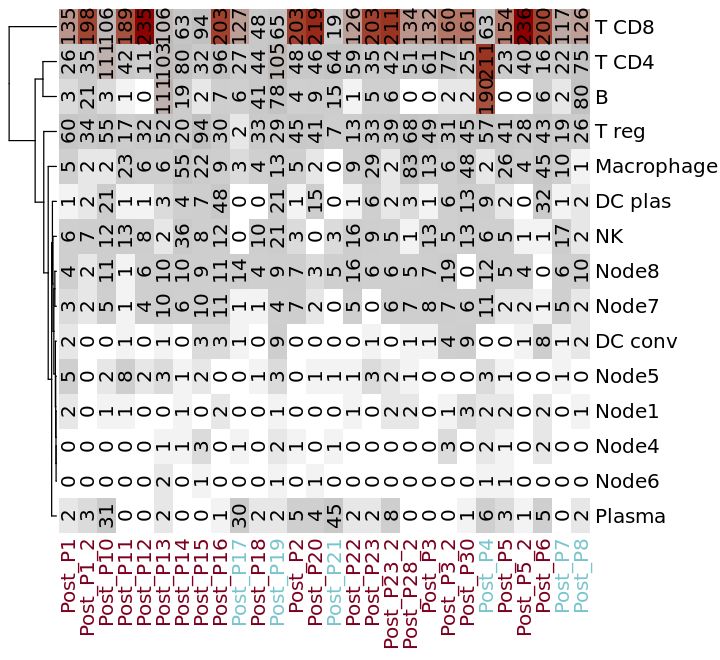

In [24]:
options(repr.plot.width = 6
      ,repr.plot.height = 5.5)

plot_cell_numbers(anno_cells_sf
                 ,"annotation_CHETAH"
                 ,col_samples)

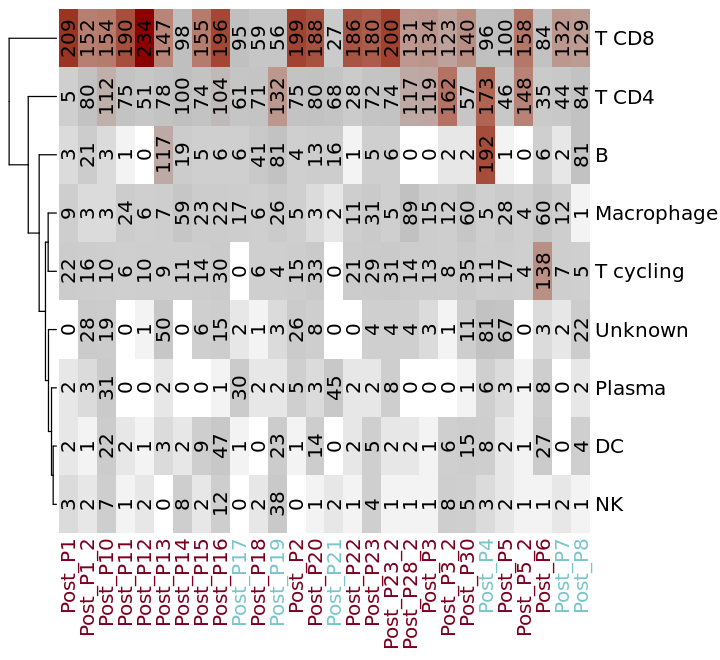

In [25]:
options(repr.plot.width = 6
      ,repr.plot.height = 5.5)

plot_cell_numbers(anno_cells_sf
                 ,"annotation_immune"
                 ,col_samples)

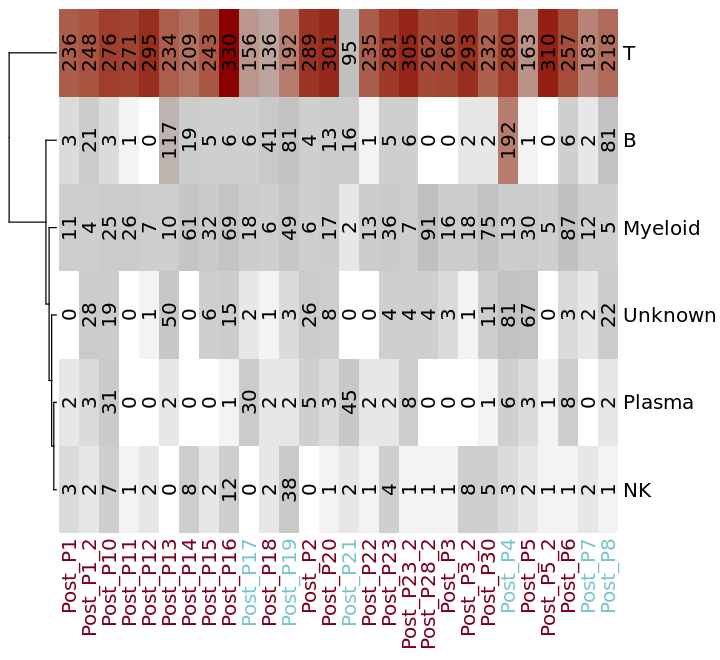

In [26]:
options(repr.plot.width = 6
      ,repr.plot.height = 5.5)

plot_cell_numbers(anno_cells_sf
                 ,"annotation_major"
                 ,col_samples)

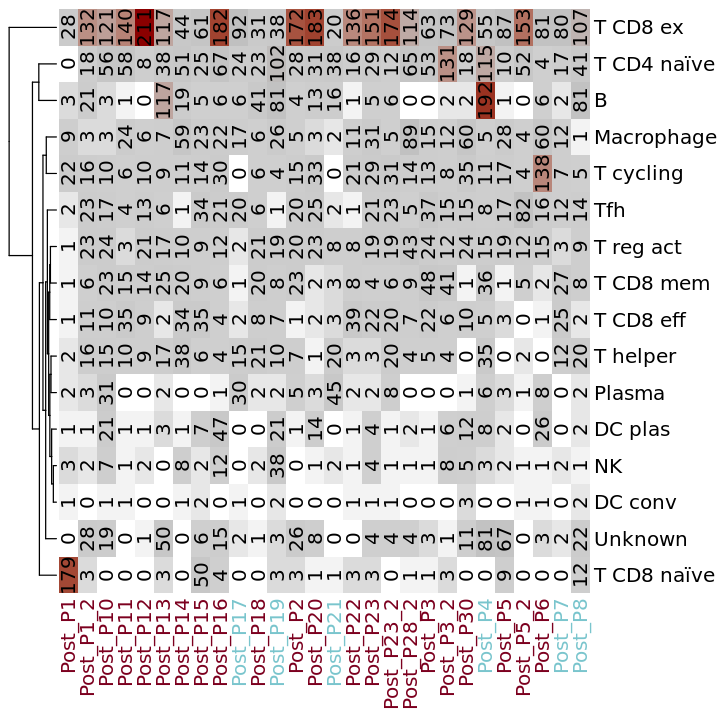

In [27]:
options(repr.plot.width = 6
      ,repr.plot.height = 6)

plot_cell_numbers(anno_cells_sf
                 ,"annotation_minor"
                 ,col_samples)

In [28]:
anno_cells_sf$cell_type_original <- anno_cells_sf$annotation_minor

# we will pull DC plas and DC conv into a DC category
anno_cells_sf$cell_type <- anno_cells_sf$cell_type_original
anno_cells_sf$cell_type[(anno_cells_sf$cell_type == 'DC plas') | (anno_cells_sf$cell_type == 'DC conv')] <- 'DC'

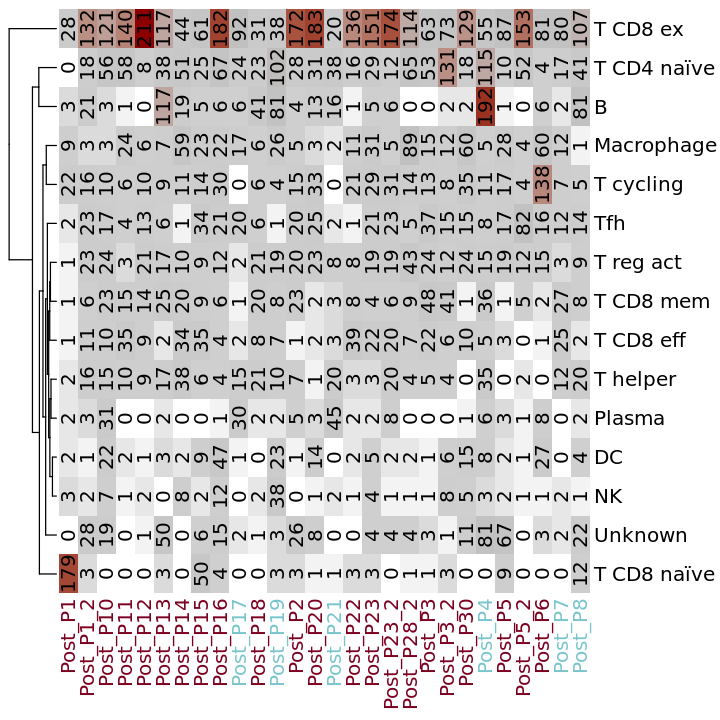

In [29]:
options(repr.plot.width = 6
      ,repr.plot.height = 6)

plot_cell_numbers(anno_cells_sf
                 ,"cell_type"
                 ,col_samples)

## Clean counts

In [30]:
str(anno_cells_sf$cell_ID)

 chr [1:8812] "A10_P1_M15" "A10_P4_M15" "A10_P5_M15" "A11_P1_M15" ...


In [31]:
# filter for chosen samples
counts_sf <- counts[,anno_cells_sf$cell_ID]
print(str(counts_sf))

'data.frame':	51005 obs. of  8812 variables:
 $ A10_P1_M15                       : num  0 0 0.805 0.0212 0 ...
 $ A10_P4_M15                       : num  0 0 0.65 0 0 ...
 $ A10_P5_M15                       : num  0 0 0.817 0 0 ...
 $ A11_P1_M15                       : num  0 0 0 0.0145 0.5403 ...
 $ A11_P2_M15                       : num  0 0 0.362 0 0 ...
 $ A11_P5_M15                       : num  0 0 0 0 0 ...
 $ A11_P6_M15                       : num  0 0 0.856 0 0 ...
 $ A12_P1_M15                       : num  0 0 0 0 0 ...
 $ A12_P2_M15                       : num  0 0 0.78 0 0 ...
 $ A12_P5_M15                       : num  0 0 0.722 0 0 ...
 $ A2_P1_M15                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A2_P2_M15                        : num  0 0 0 0 0 ...
 $ A2_P3_M15                        : num  0 0 0.319 0.512 0.319 ...
 $ A2_P6_M15                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A3_P2_M15                        : num  0 0 0 0 0 ...
 $ A3_P6_M15               

In [32]:
#filter zero genes
idx_nonZero <- counts_sf != 0

idx_nonZero_sum <- rowSums(idx_nonZero)
print(paste("we have"
            ,sum(idx_nonZero_sum == 0)
            ,"all-zero genes. These genes will be removed."))

counts_sf_gf <- counts_sf[idx_nonZero_sum != 0,]
print("dim(counts_sf)")
print(dim(counts_sf))
print("dim(counts_sf_gf)")
print(dim(counts_sf_gf))

[1] "we have 0 all-zero genes. These genes will be removed."
[1] "dim(counts_sf)"
[1] 51005  8812
[1] "dim(counts_sf_gf)"
[1] 51005  8812


In [33]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2537125,135.5,4005340,214.0,4005340,214.0
Vcells,1402297994,10698.7,2161343004,16489.8,1801040460,13740.9


## Clean gene annotation

In [34]:
# rename the index column to gene_symbol
colnames(anno_genes)[colnames(anno_genes) == "index"]<- "gene_symbol"

# subsitiue . with _
colnames(anno_genes) <- gsub('[.]','_',colnames(anno_genes))
print(head(colnames(anno_genes)))

[1] "gene_symbol"               "vst_mean"                 
[3] "vst_variance"              "vst_variance_expected"    
[5] "vst_variance_standardized" "vst_variable"             


In [35]:
# remove all zero genes
anno_genes_gf <- anno_genes[rownames(counts_sf_gf),]
print(str(anno_genes))
print(str(anno_genes_gf))

'data.frame':	51005 obs. of  10 variables:
 $ gene_symbol              : chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ vst_mean                 : num  0.1874 0.0254 25.1239 11.7653 12.0984 ...
 $ vst_variance             : num  55.62 1.71 5881.65 4097.14 4653.66 ...
 $ vst_variance_expected    : num  15.66 1.13 9646 3859.3 3994.57 ...
 $ vst_variance_standardized: num  2.95 1.52 0.61 1.06 1.16 ...
 $ vst_variable             : chr  "True" "False" "False" "False" ...
 $ highly_variable          : chr  "False" "False" "False" "True" ...
 $ means                    : num  0.001669 0.000333 0.163605 0.073268 0.074602 ...
 $ dispersions              : num  0.179 -0.664 0.186 0.365 0.274 ...
 $ dispersions_norm         : num  0.899 0.14 -0.38 1.067 0.984 ...
NULL
'data.frame':	51005 obs. of  10 variables:
 $ gene_symbol              : chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ vst_mean                 : num  0.1874 0.0254 25.1239 11.7653 12.0984 ...
 $ vst_variance             : num  55.62 1.71

# Export

In [36]:
# export anno_samples 
anno_samples <- anno_samples_sf
save(anno_samples, file=paste0(path_out,'anno_samples.RData'))

In [37]:
# export anno_cells
anno_cells <- anno_cells_sf
save(anno_cells, file=paste0(path_out,'anno_cells.RData'))

In [38]:
# export anno_genes
anno_genes <- anno_genes_gf
save(anno_genes, file=paste0(path_out,'anno_genes.RData'))

In [39]:
# export counts
counts <- counts_sf_gf
save(counts, file=paste0(path_out,'counts.RData'))